# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset

In [2]:
dataset = get_dataset("download/data/processed/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['download/data/processed/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['download/data/processed/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 100
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
import cv2
import IPython
import numpy

def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)
    
def draw_rectangle(image, x1, y1, x2, y2, color):
    thickness = 2
    cv2.line(image, (x1, y1), (x1, y2), color, thickness)
    cv2.line(image, (x1, y1), (x2, y1), color, thickness)    
    cv2.line(image, (x2, y1), (x2, y2), color, thickness)
    cv2.line(image, (x1, y2), (x2, y2), color, thickness)

mapping = {1: 'vehicle', 2: 'pedestrian', 4: 'cyclist'}
colors = {1: (0, 255, 0), 2: (0, 0, 255), 4: (255, 0, 255)}

def bgr_to_rgb(image):
    image2 = numpy.zeros(image.shape, dtype = image.dtype)
    image2[:, :, 0] = image[:, :, 2]
    image2[:, :, 1] = image[:, :, 1]
    image2[:, :, 2] = image[:, :, 0]
    return image2
    
def draw_boxes(image, boxes, classes):
    n = boxes.shape[0]
    h = image.shape[0]
    w = image.shape[1]
    for i in range(n):
        box = boxes[i]
        class1 = classes[i]
        x1 = int(box[1] * w + 0.5)
        y1 = int(box[0] * h + 0.5)
        x2 = int(box[3] * w + 0.5)
        y2 = int(box[2] * h + 0.5)
        color = colors[class1]
        draw_rectangle(image, x1, y1, x2, y2, color)

def display_instance(instance):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
    #print(instance)
    filename = str(instance['source_id'].numpy())
    print(filename)
    image = bgr_to_rgb(instance['image'].numpy())
    boxes = instance['groundtruth_boxes'].numpy()
    classes = instance['groundtruth_classes'].numpy()
    print(f'classes: {classes.shape[0]}\n{classes}')
    draw_boxes(image, boxes, classes)
    imshow(image)
        
def take_n_elements(dataset, n):
    iterator = iter(dataset)
    elements = []
    for i in range(n):
        element = next(iterator)
        elements.append(element)
    return elements

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

In [4]:
## STUDENT SOLUTION HERE
batch = take_n_elements(dataset, 100)

b'segment-1005081002024129653_5313_150_5333_150_with_camera_labels_24.tfrecord'
classes: 13
[1 1 1 1 1 1 2 1 1 2 2 1 2]


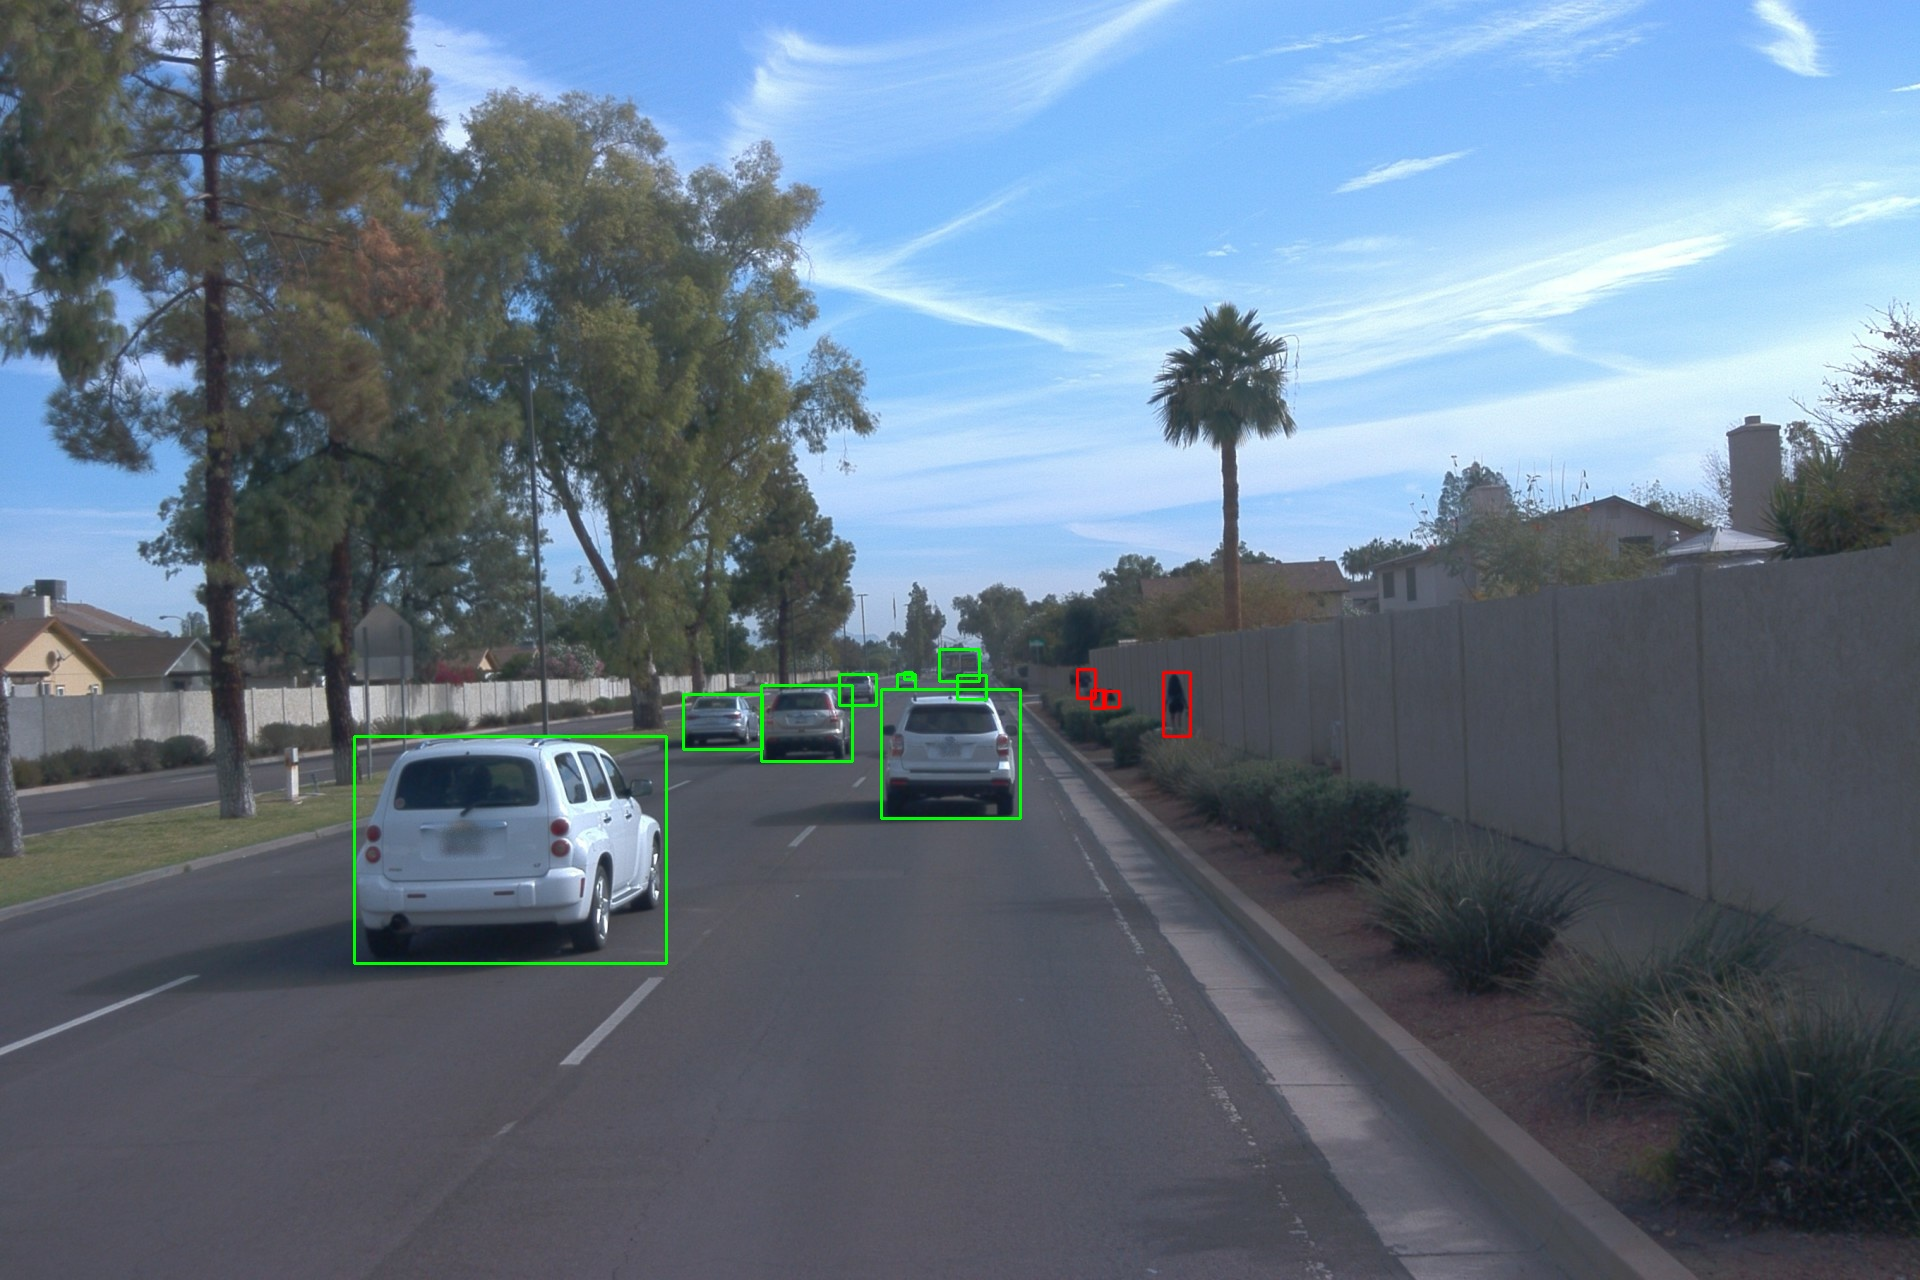

In [5]:
display_instance(batch[0])

b'segment-10444454289801298640_4360_000_4380_000_with_camera_labels_20.tfrecord'
classes: 46
[1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 1 2 2 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1
 2 1 1 2 2 1 1 1 1]


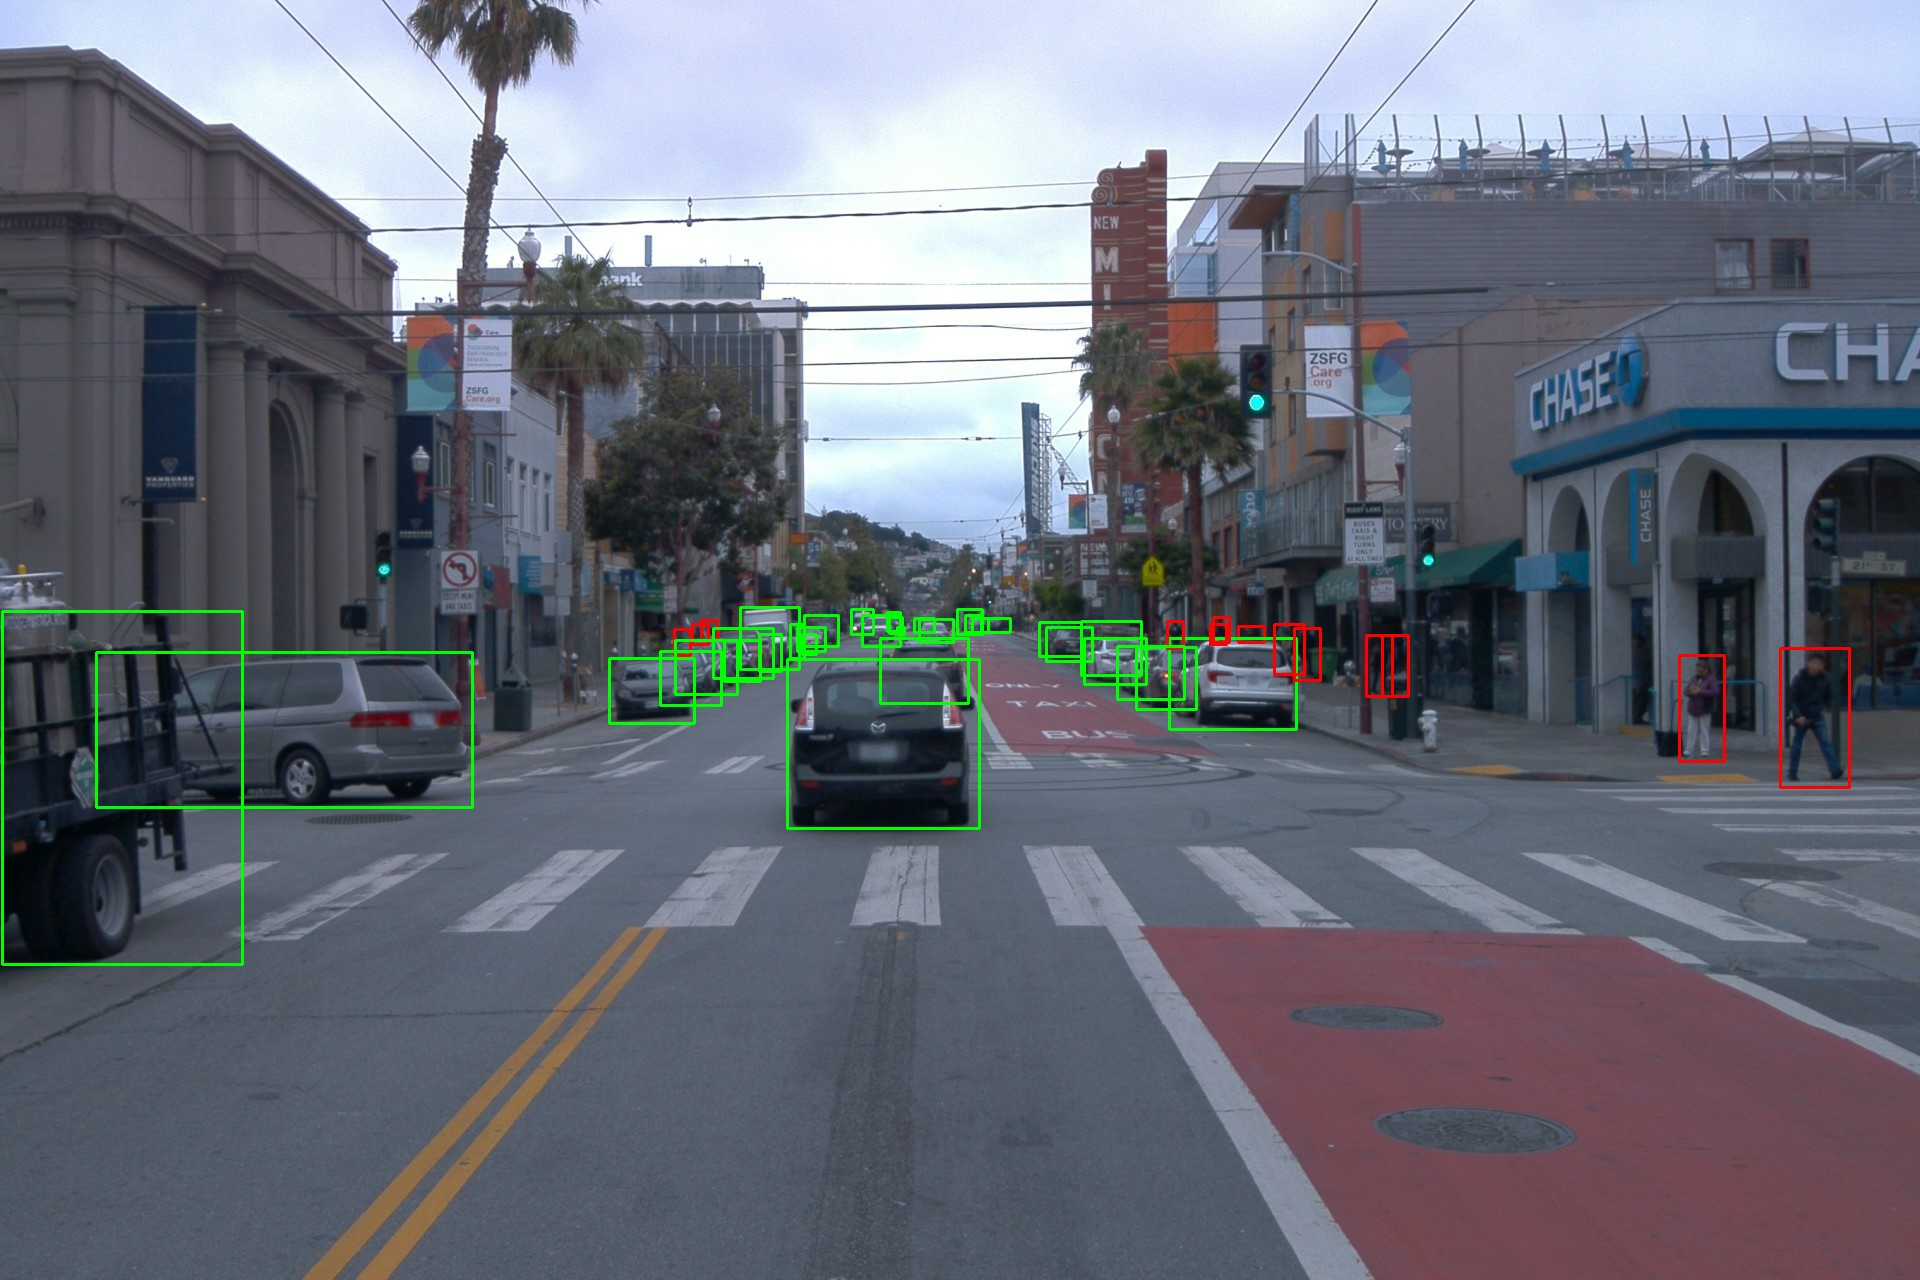

In [6]:
display_instance(batch[1])

b'segment-10498013744573185290_1240_000_1260_000_with_camera_labels_15.tfrecord'
classes: 30
[1 1 1 1 1 1 2 1 1 2 2 2 1 1 1 1 2 1 2 2 1 1 1 2 1 1 1 1 1 2]


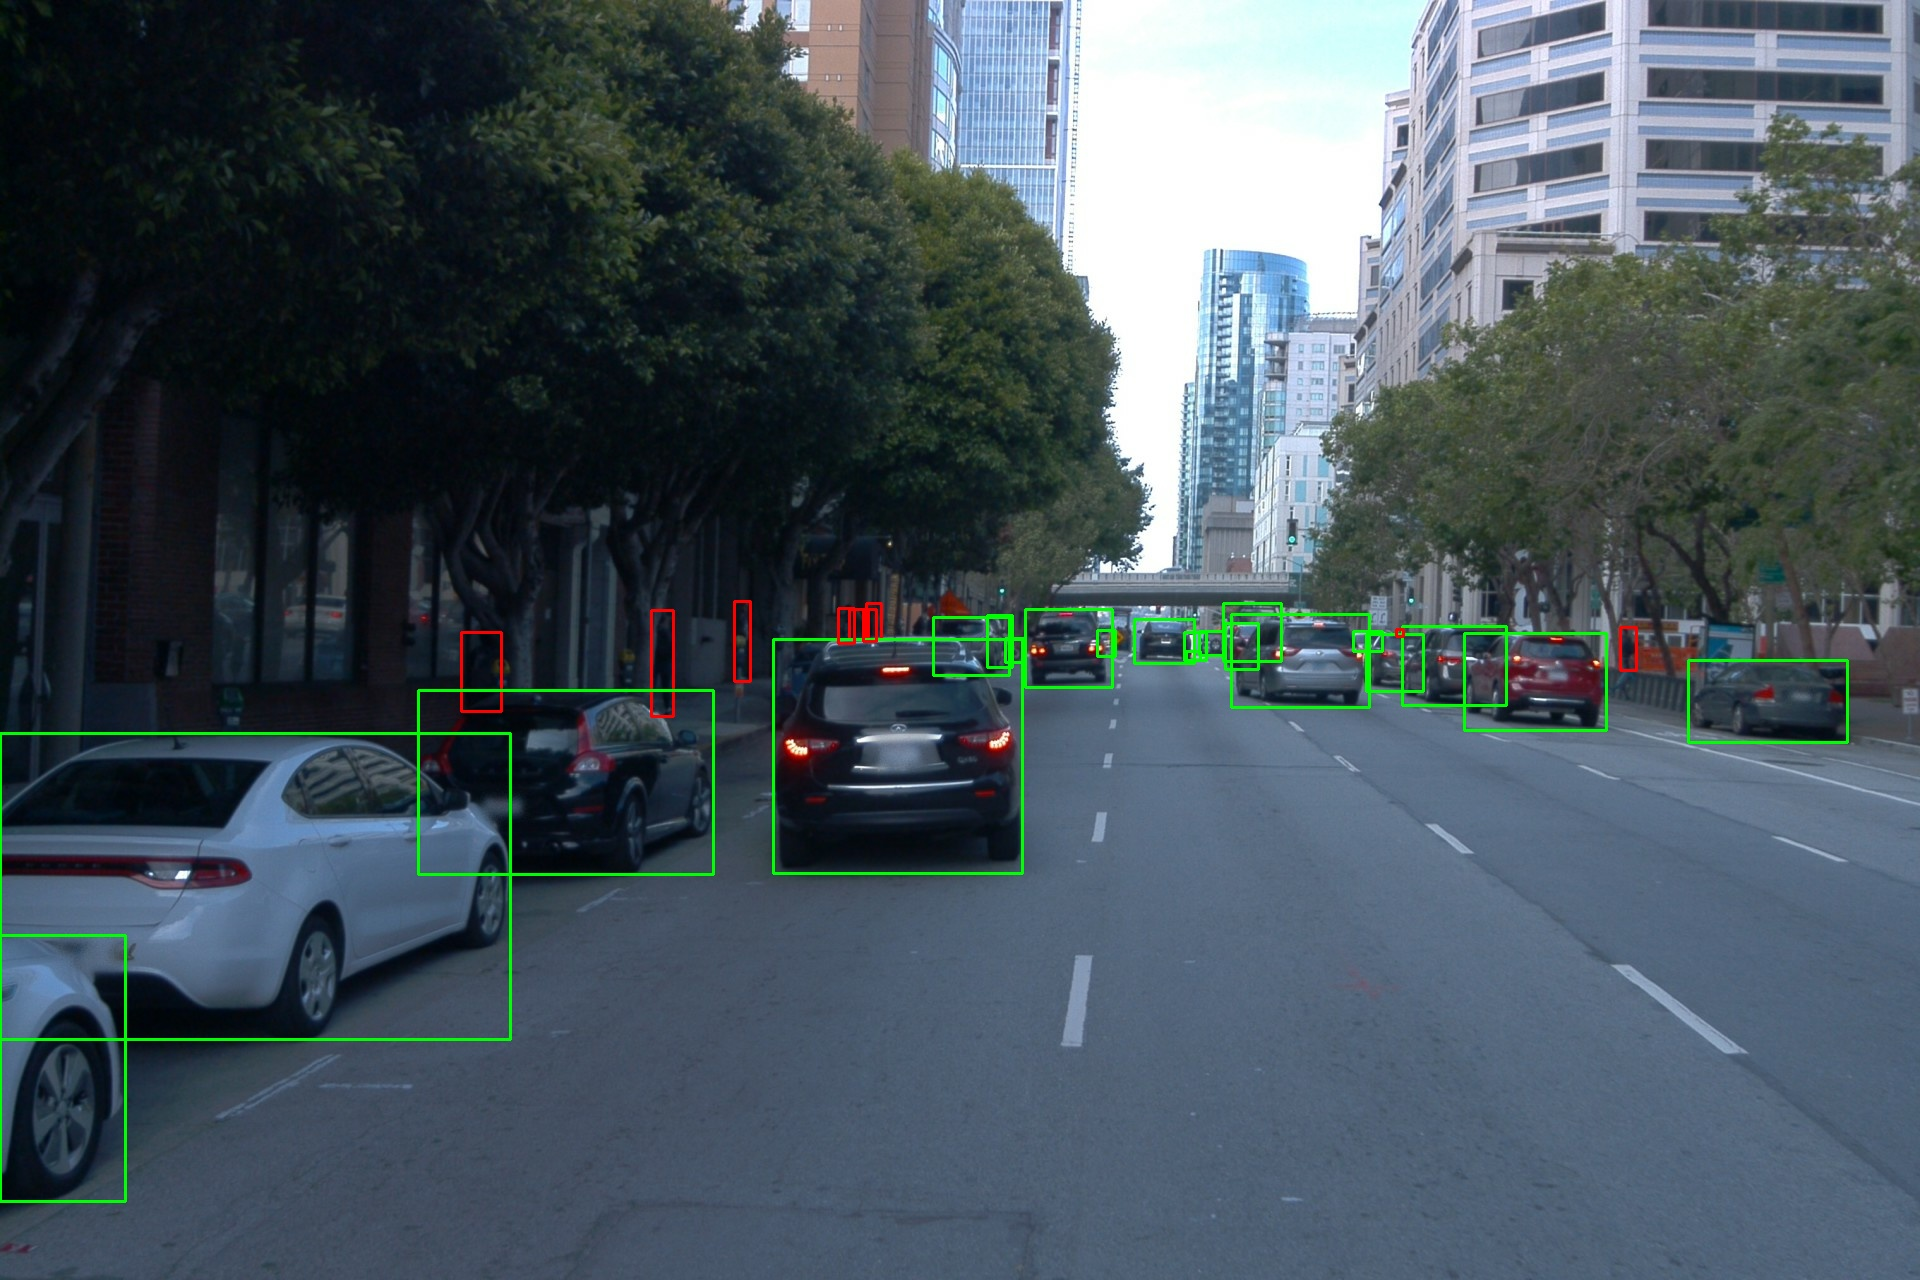

In [7]:
display_instance(batch[2])

b'segment-11343624116265195592_5910_530_5930_530_with_camera_labels_23.tfrecord'
classes: 34
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


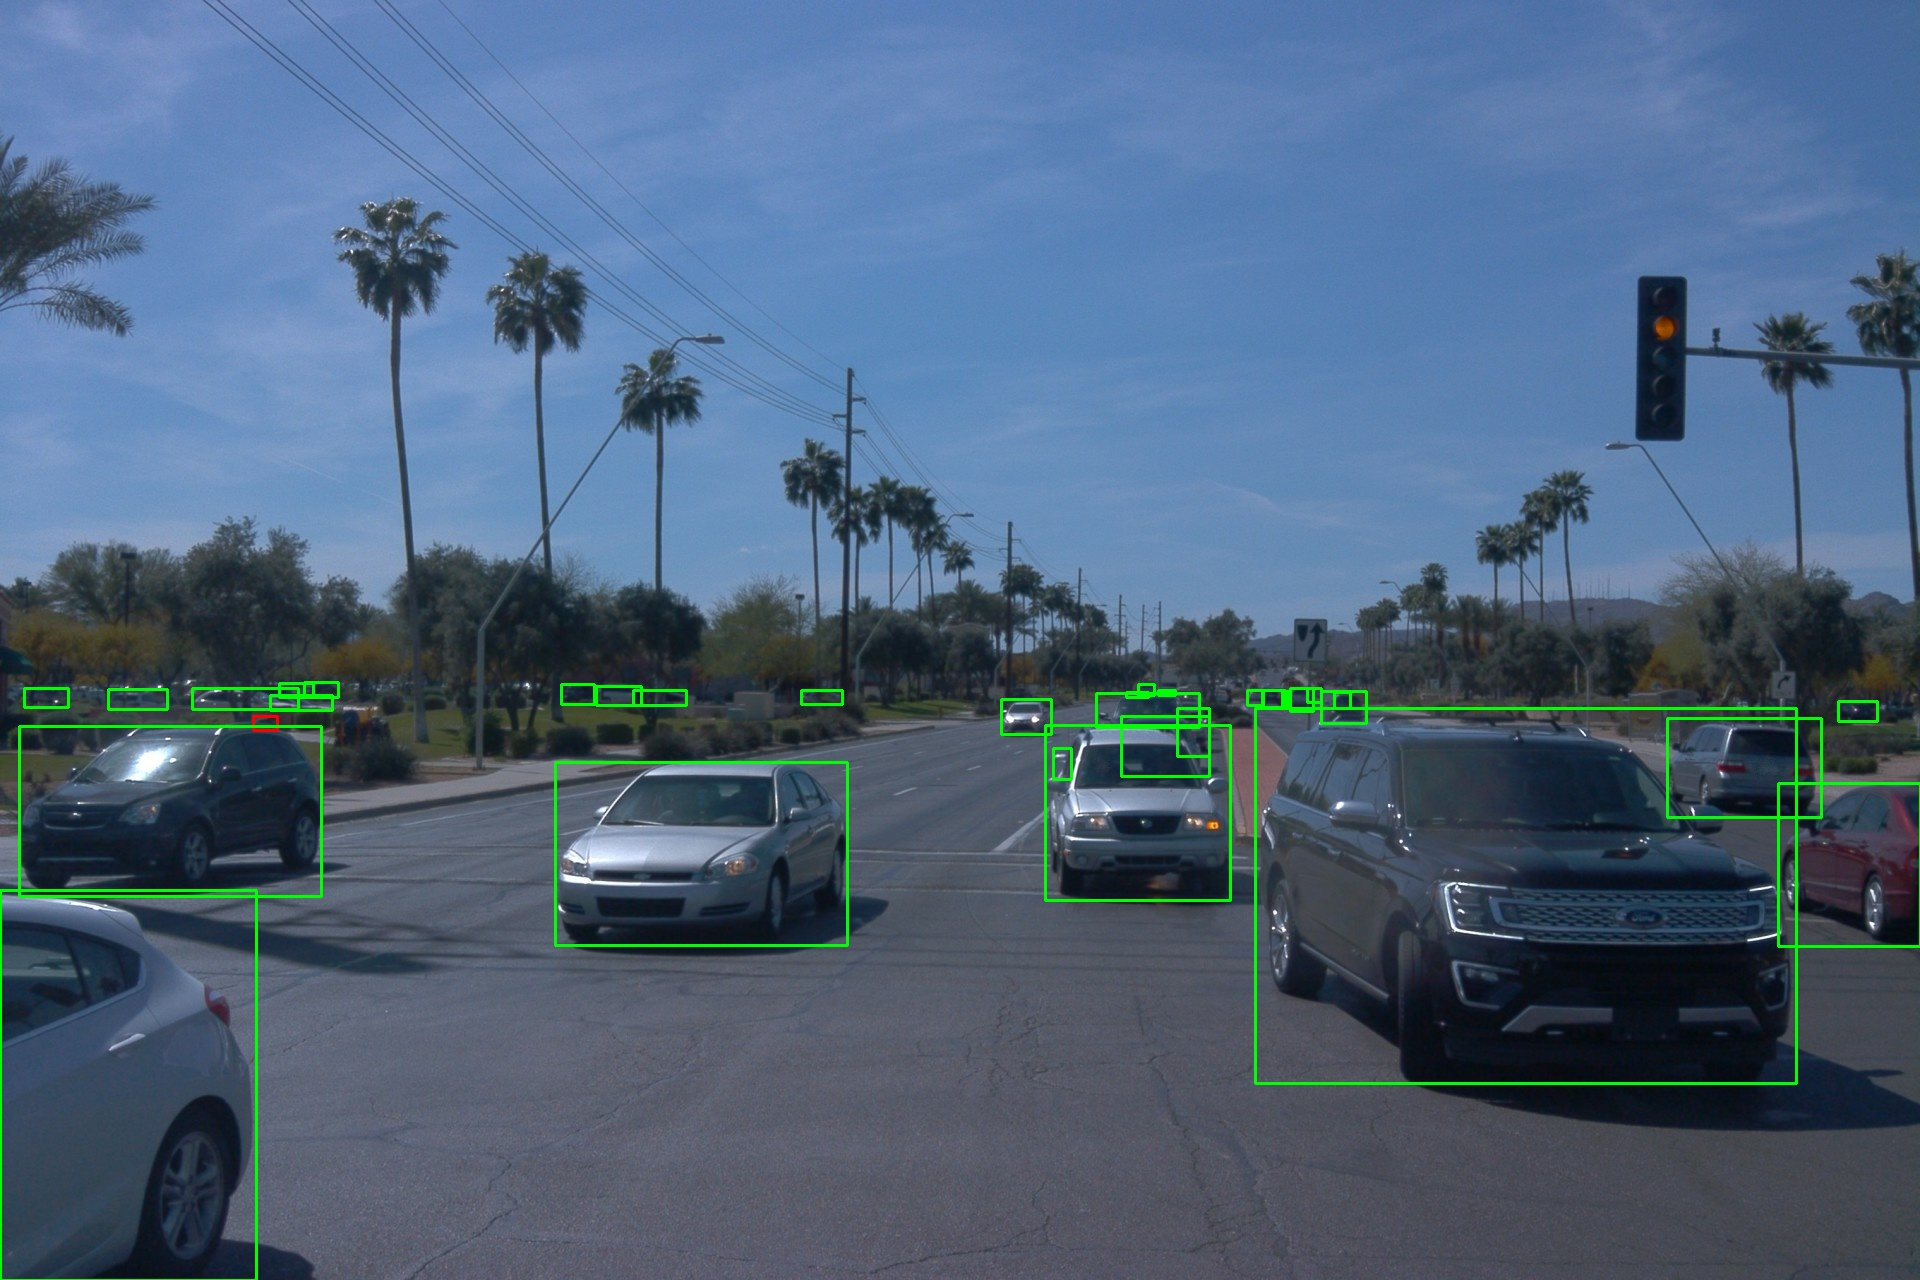

In [8]:
display_instance(batch[3])

b'segment-12161824480686739258_1813_380_1833_380_with_camera_labels_32.tfrecord'
classes: 20
[2 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1]


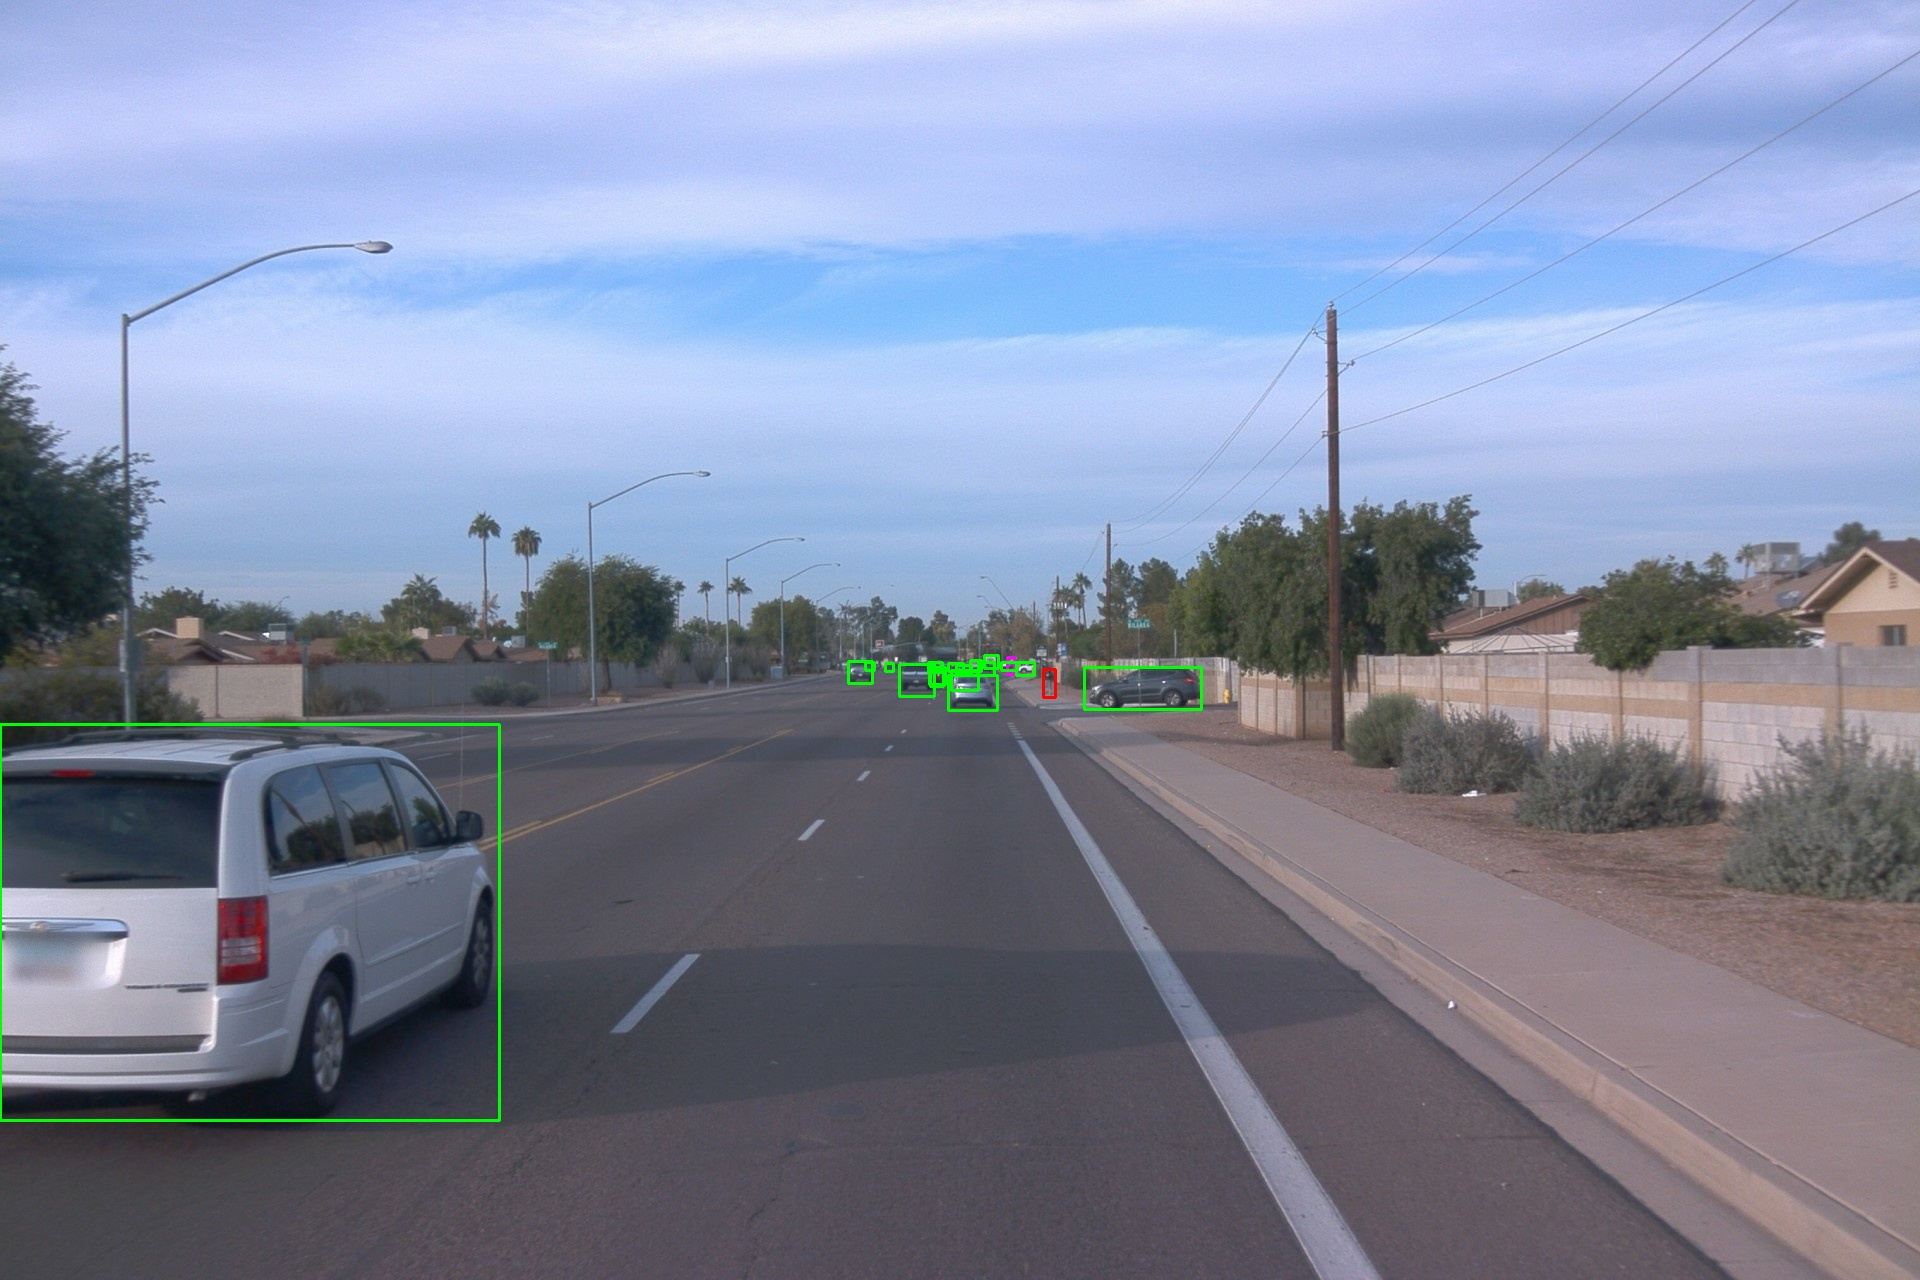

In [9]:
display_instance(batch[4])

b'segment-1022527355599519580_4866_960_4886_960_with_camera_labels_43.tfrecord'
classes: 39
[2 2 2 2 1 1 1 2 2 1 1 1 1 2 2 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1
 2 1]


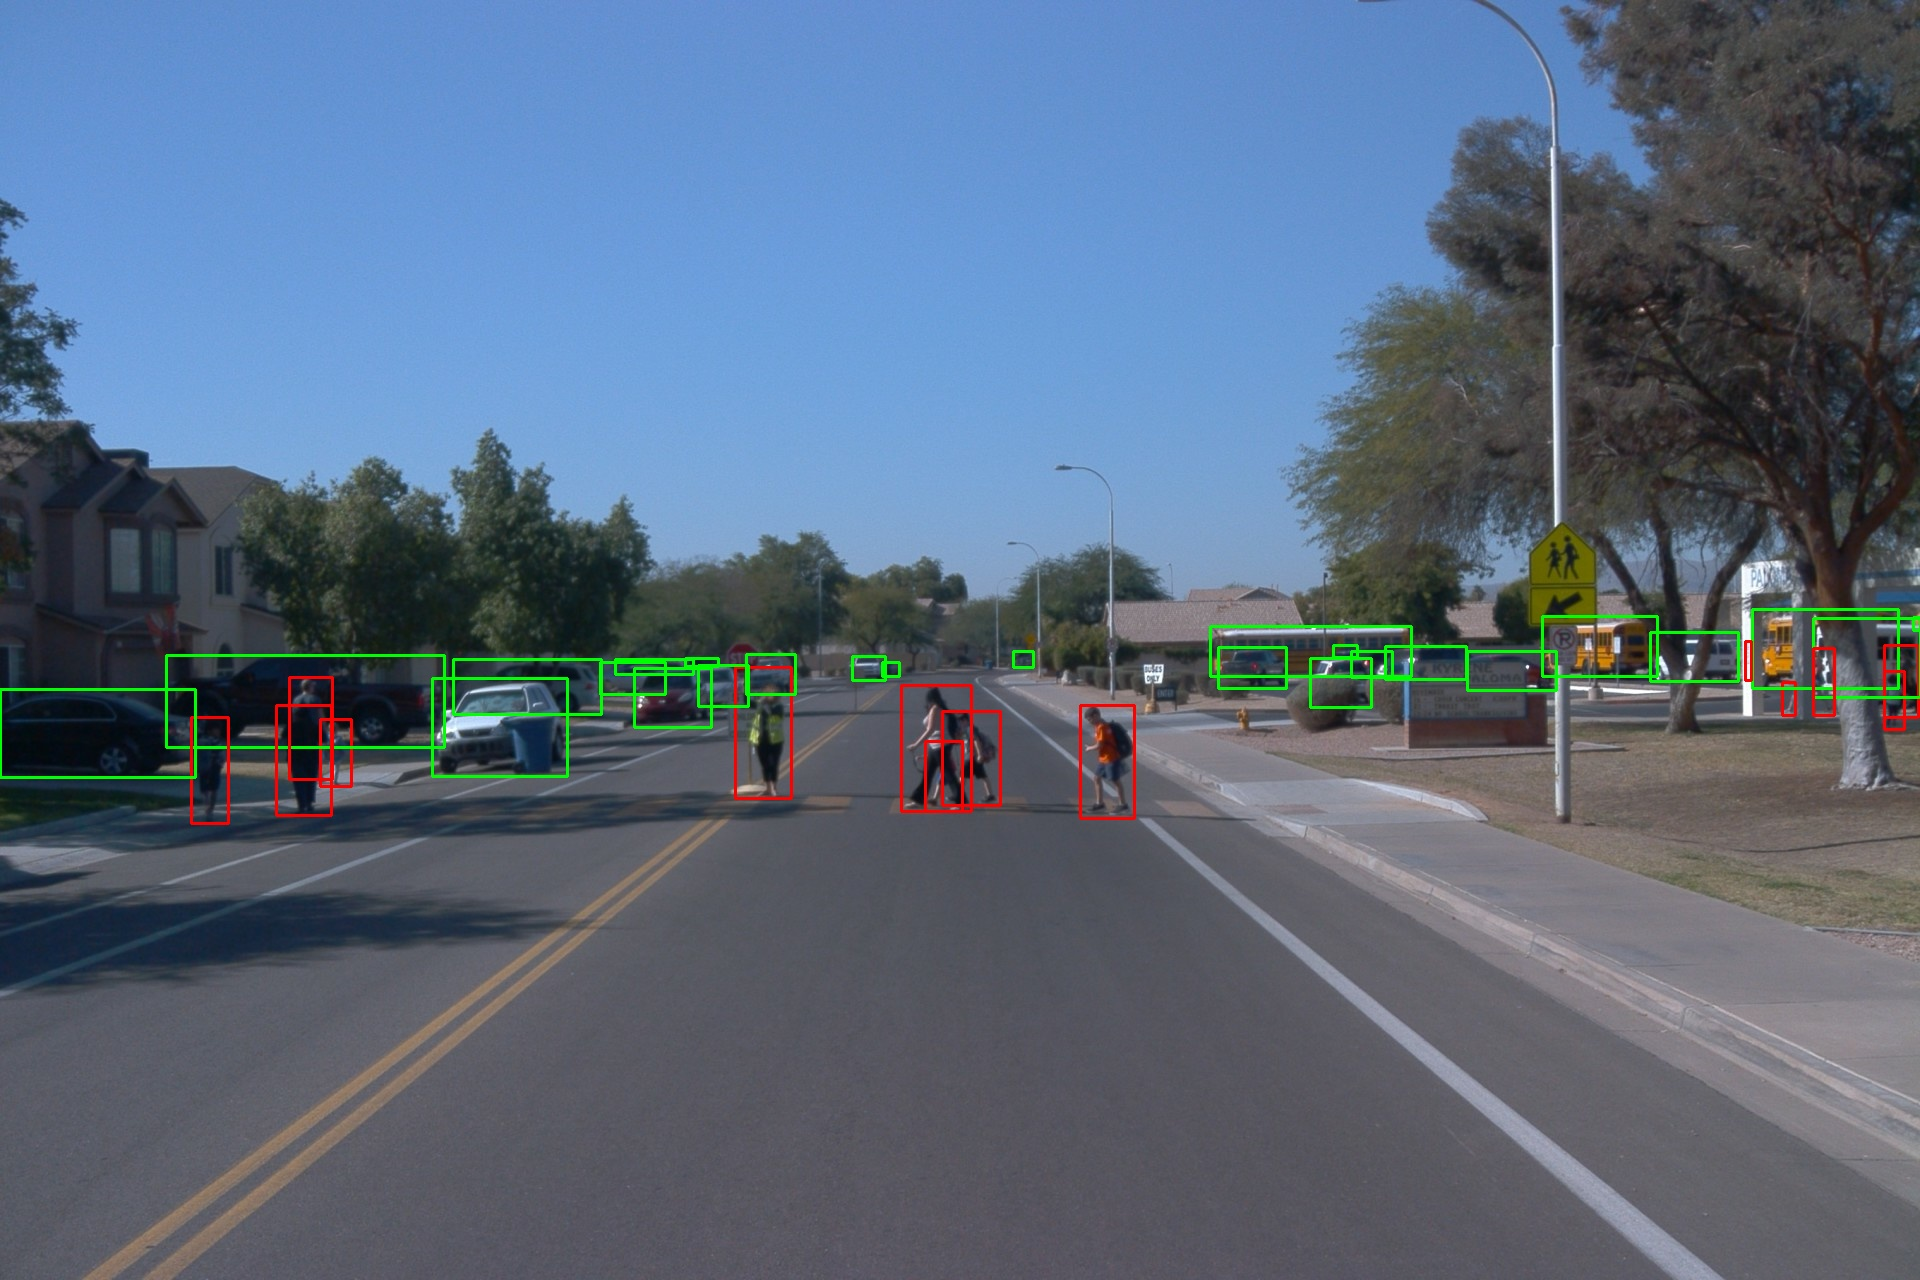

In [10]:
display_instance(batch[5])

b'segment-10075870402459732738_1060_000_1080_000_with_camera_labels_19.tfrecord'
classes: 1
[1]


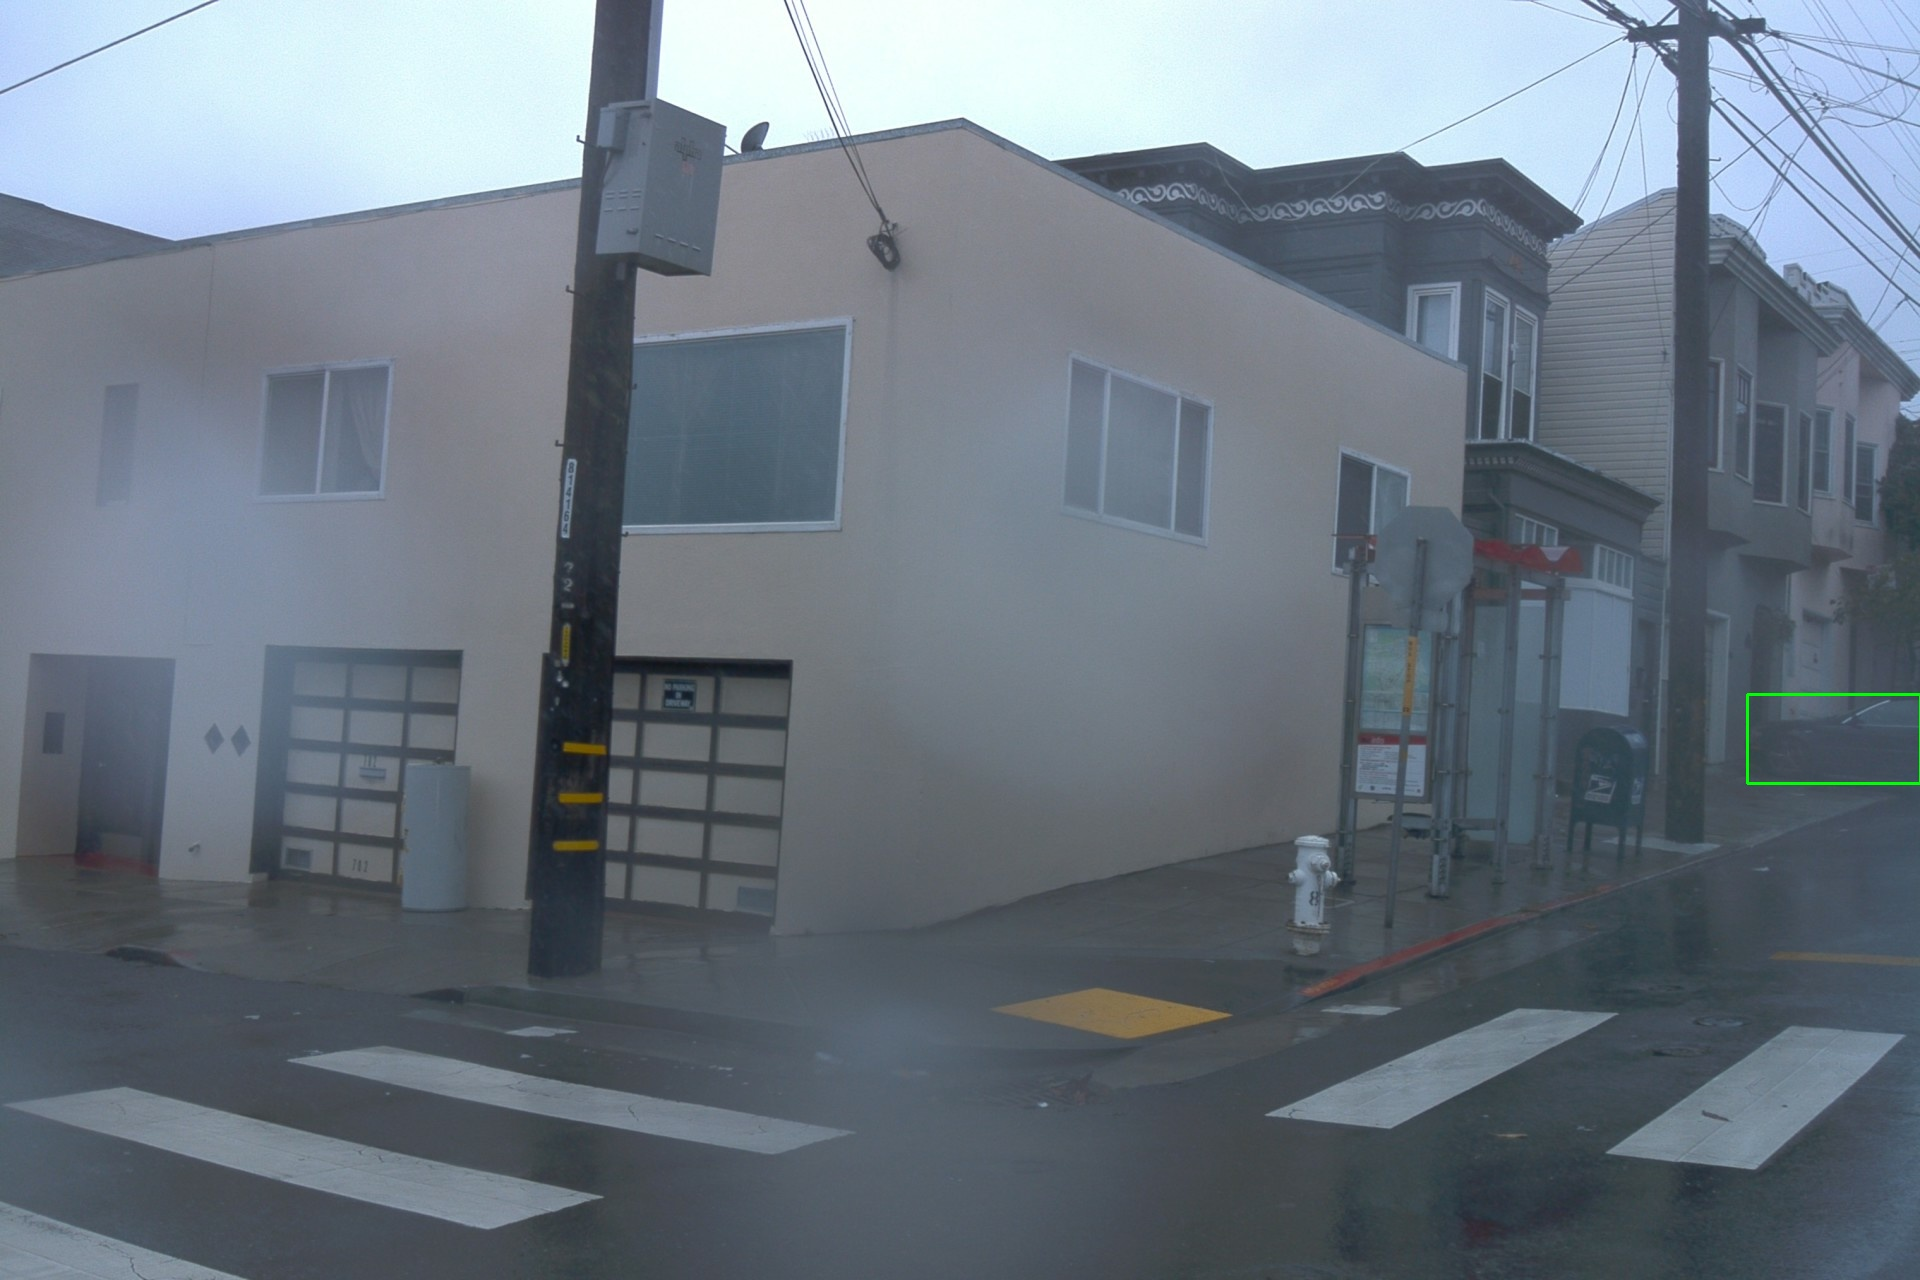

In [11]:
display_instance(batch[6])

b'segment-10975280749486260148_940_000_960_000_with_camera_labels_33.tfrecord'
classes: 6
[1 1 1 1 1 1]


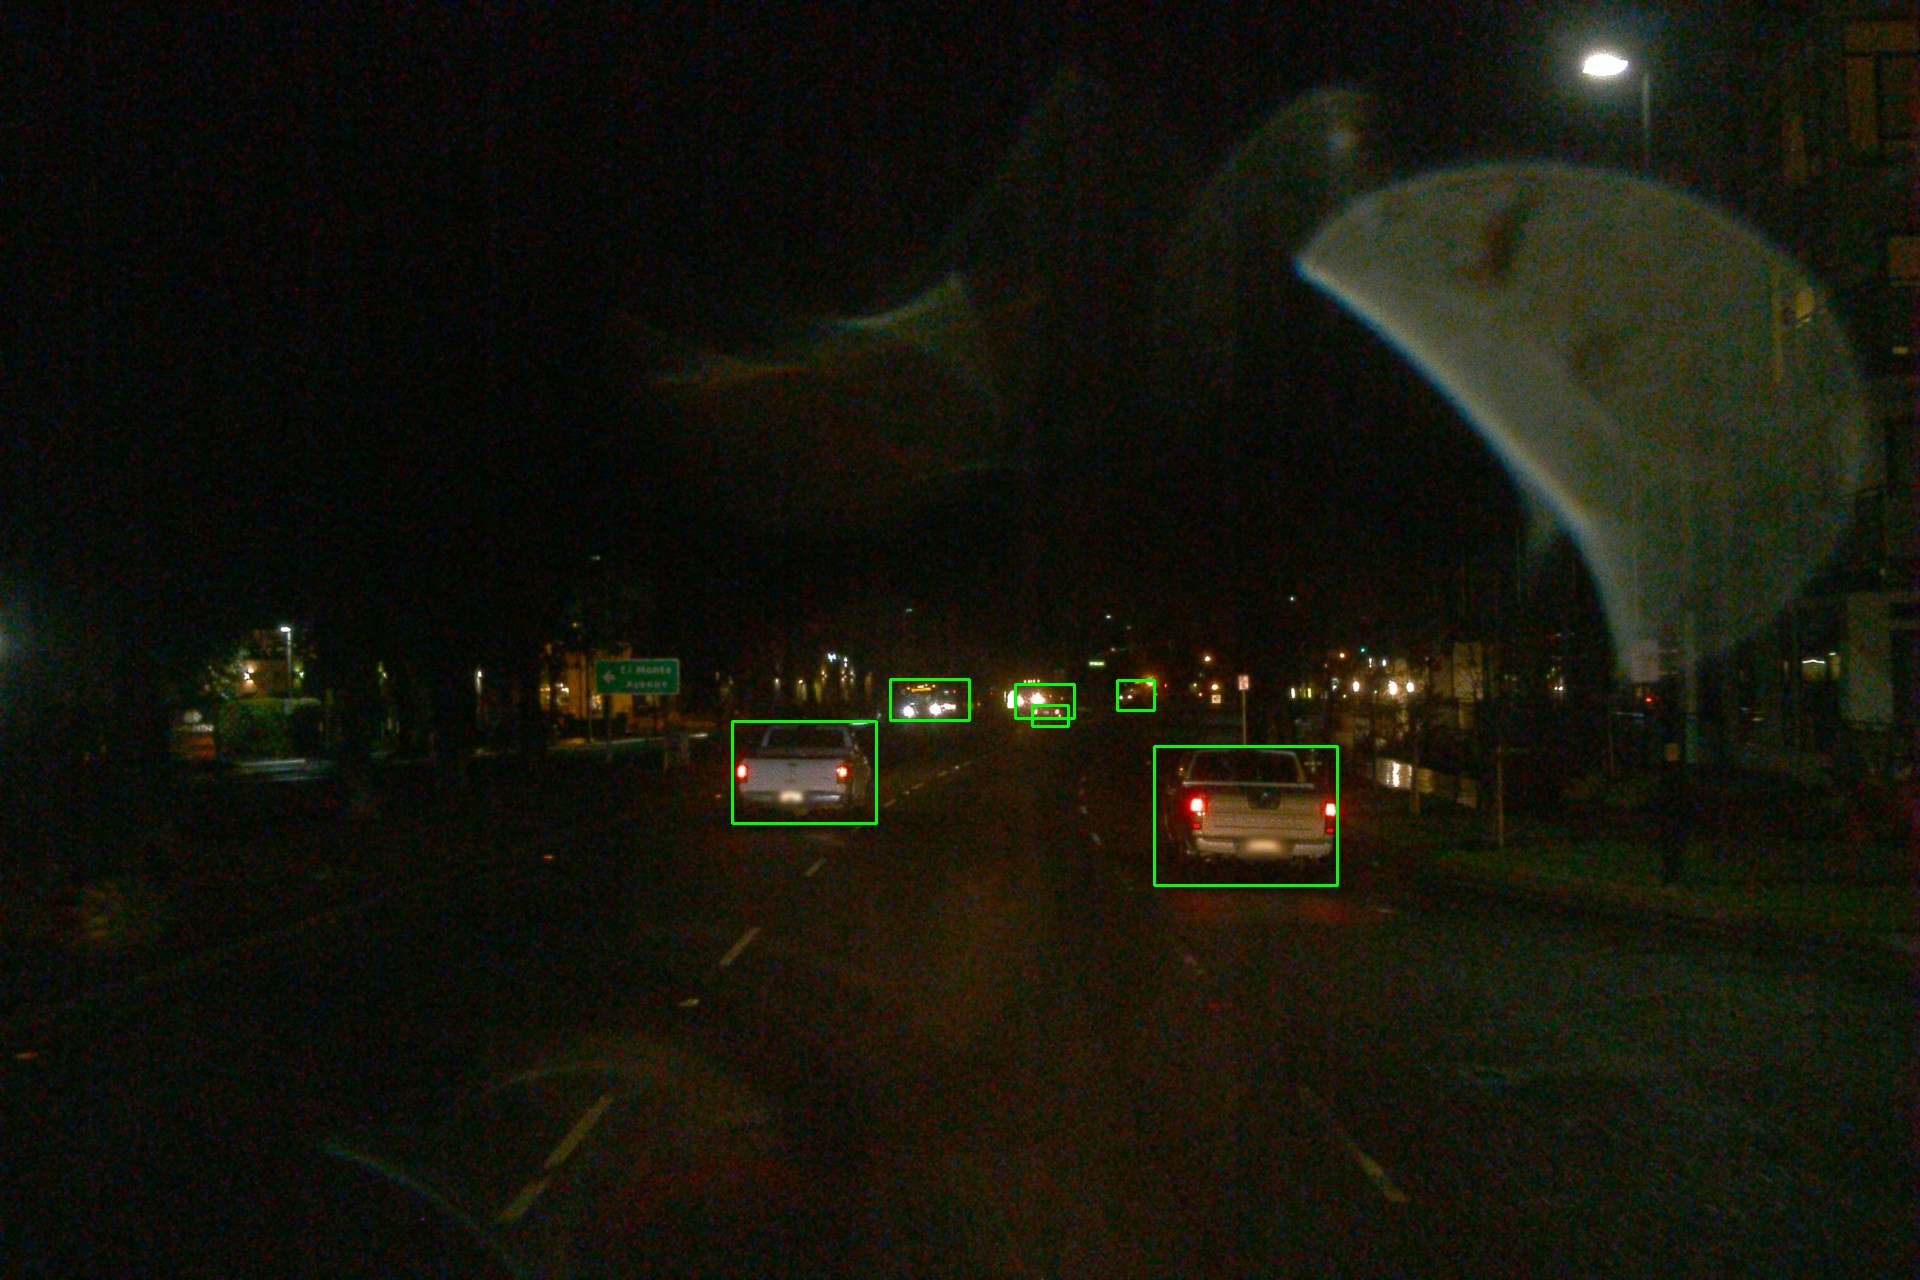

In [12]:
display_instance(batch[7])

b'segment-10664823084372323928_4360_000_4380_000_with_camera_labels_22.tfrecord'
classes: 35
[2 2 2 1 1 1 2 2 2 2 2 1 1 1 2 1 1 2 1 1 1 2 1 1 1 2 2 2 1 1 2 1 1 1 2]


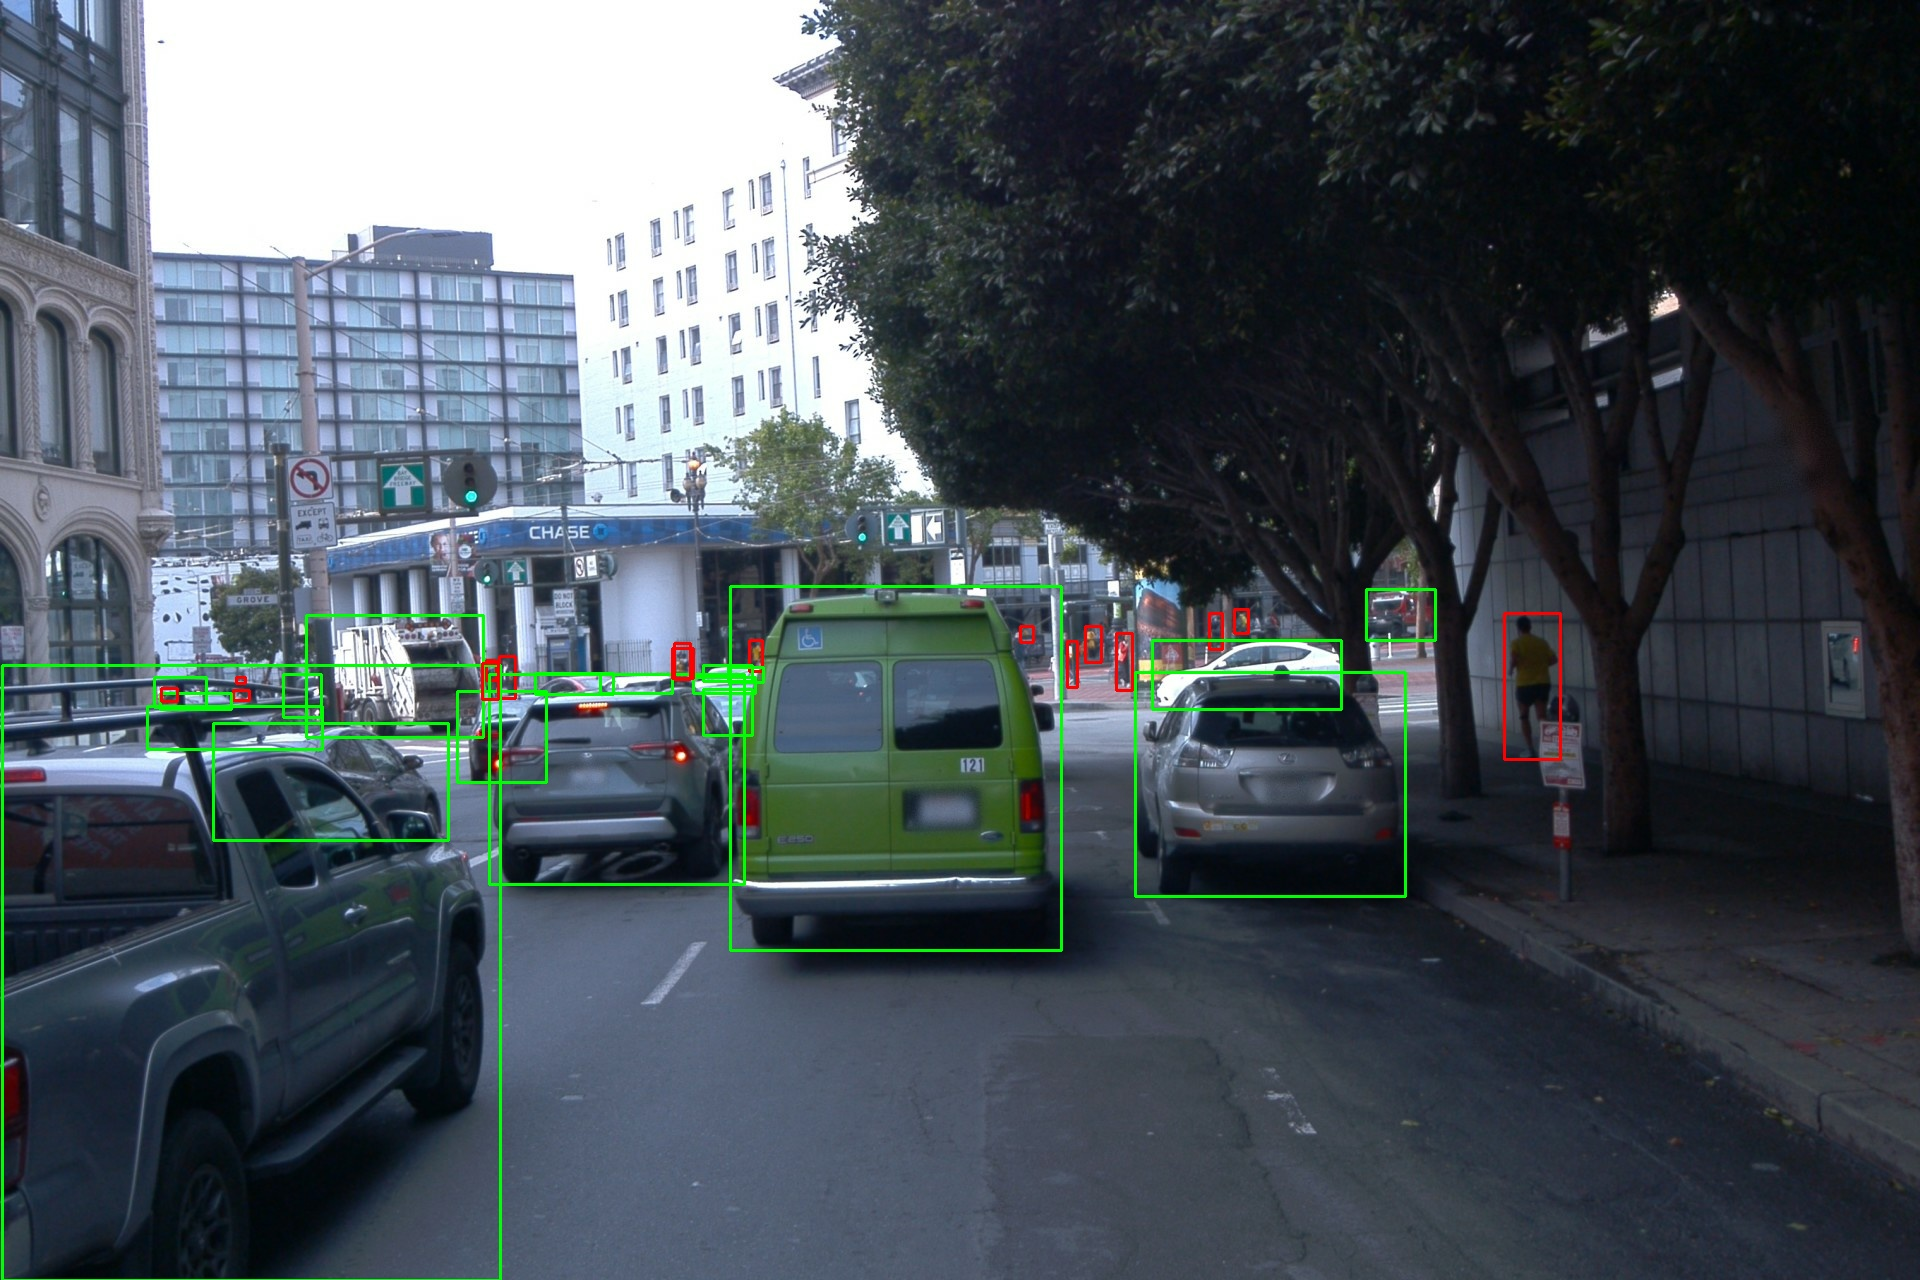

In [13]:
display_instance(batch[8])

b'segment-11017034898130016754_697_830_717_830_with_camera_labels_21.tfrecord'
classes: 11
[1 4 1 1 1 1 1 1 1 1 1]


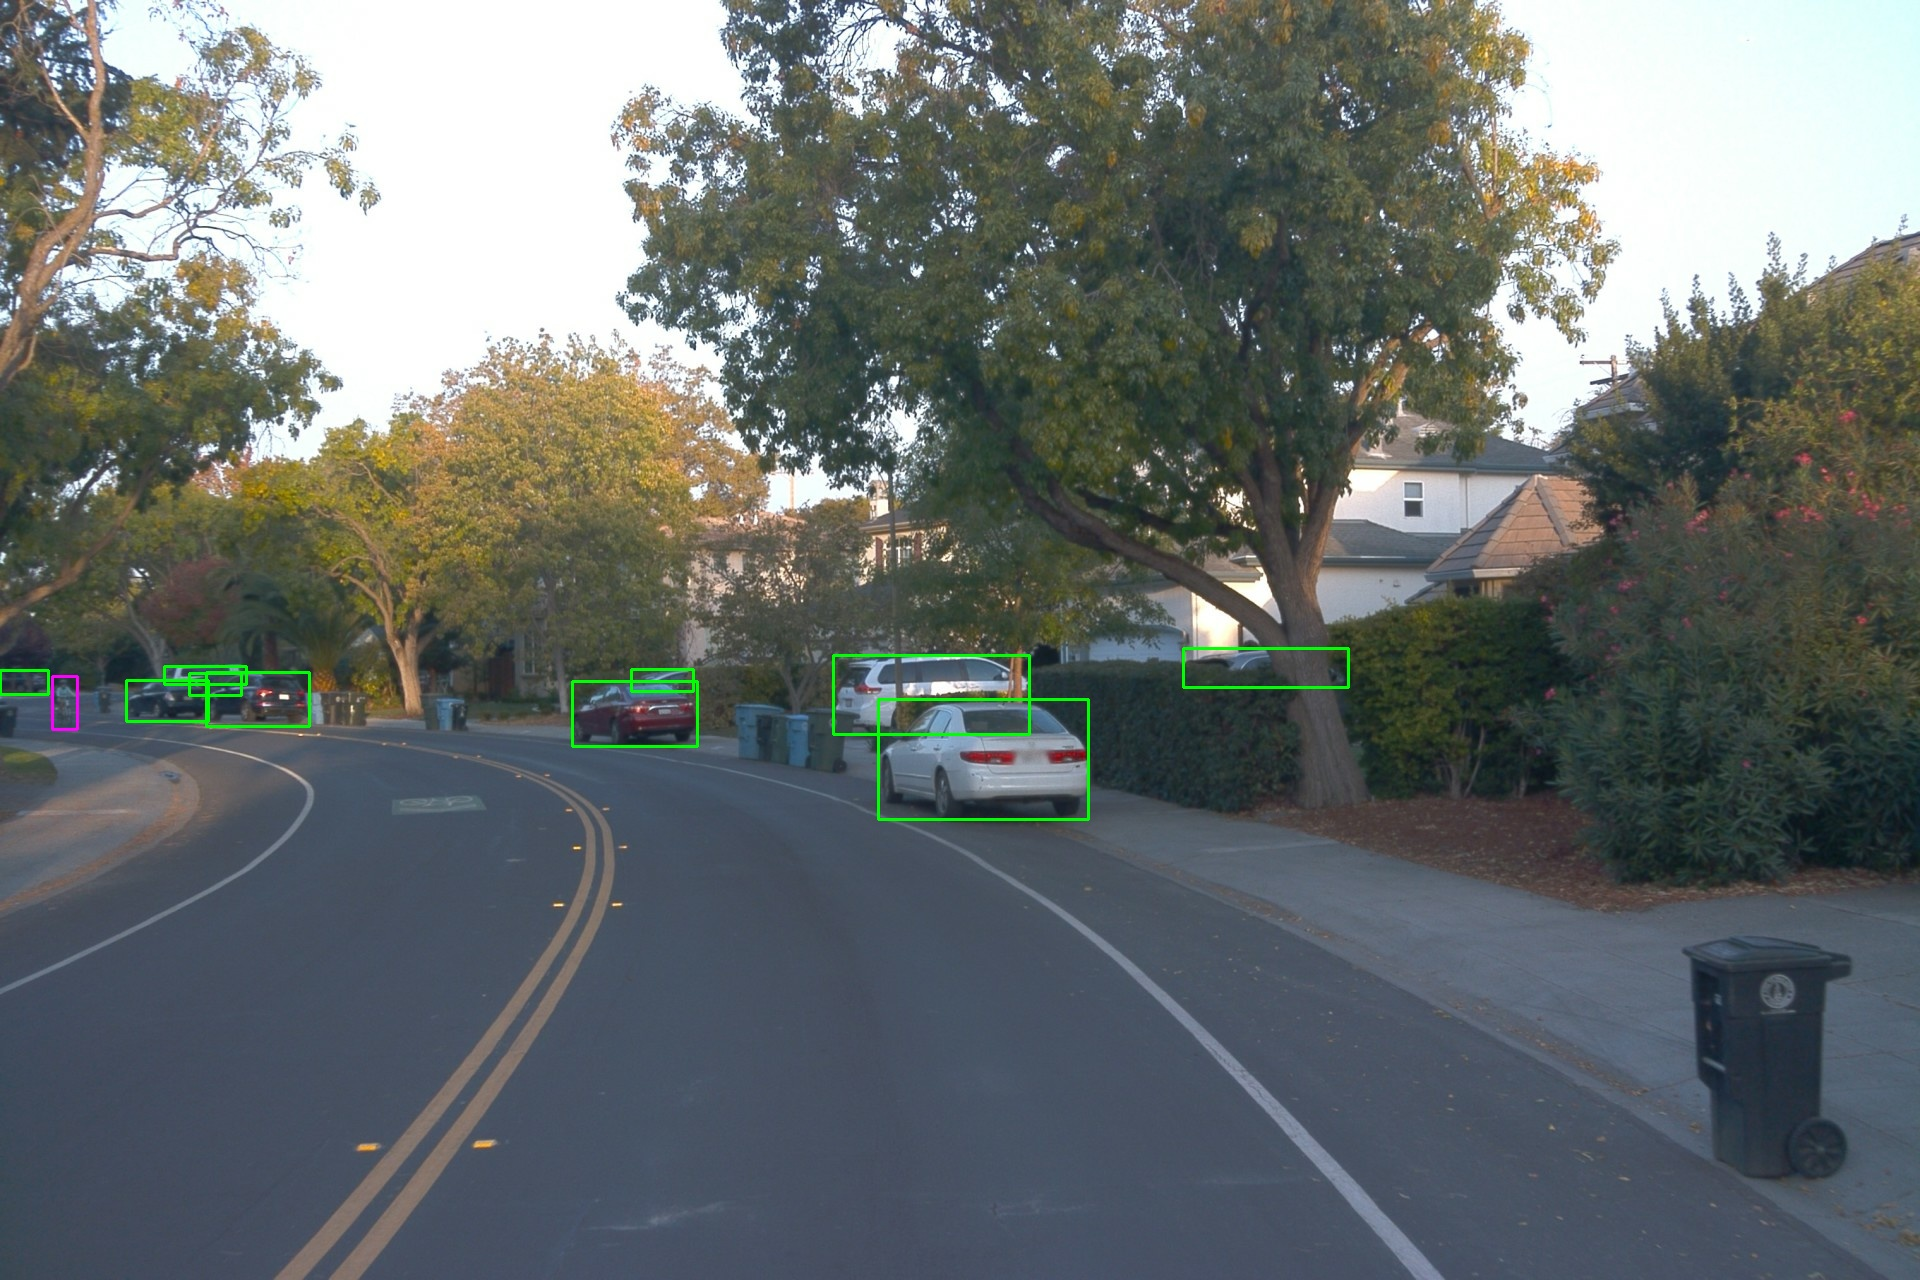

In [14]:
display_instance(batch[9])

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [15]:
class Object:
    
    def __init__(self, class1, width, height):
        self.class1 = class1
        self.width = width
        self.height = height
    
def get_objects(tf_record):
    objects = []
    boxes = tf_record['groundtruth_boxes'].numpy()
    classes = tf_record['groundtruth_classes'].numpy()
    image = bgr_to_rgb(tf_record['image'].numpy())
    h = image.shape[0]
    w = image.shape[1]
    n = classes.shape[0]
    for i in range(n):
        box = boxes[i]
        class1 = classes[i]
        x1 = int(box[1] * w + 0.5)
        y1 = int(box[0] * h + 0.5)
        x2 = int(box[3] * w + 0.5)
        y2 = int(box[2] * h + 0.5)
        width = abs(x2 - x1)
        height = abs(y2 - y1)
        object1 = Object(class1, width, height)
        objects.append(object1)
    return objects

def get_all_objects(sample):
    all_objects = []
    for tf_record in sample:
        objects = get_objects(tf_record)
        all_objects = all_objects + objects
    return all_objects

def classify_all_objects(all_objects):
    classes = {1: [], 2: [], 4: []}
    for object1 in all_objects:
        class1 = object1.class1
        classes[class1].append(object1)
    return classes

def stats_of_objects(objects):
    n = len(objects)
    widths = [object1.width for object1 in objects]
    heights = [object1.height for object1 in objects]
    average_width = sum(widths) / (n  + 0.)
    average_height = sum(heights) / (n  + 0.)
    return n, average_width, average_height

def show_average_image(object_type, width, height, color):
    print(f'Average size of {object_type}: ({width:.2f}, {height:.2f})')
    w = int(width + 0.5)
    h = int(height + 0.5)
    img = numpy.ones((h, w, 3), dtype = numpy.int)
    img[:, :, 0] *= color[0]
    img[:, :, 1] *= color[1]
    img[:, :, 2] *= color[2]
    imshow(img)

import matplotlib.pyplot as plt
%matplotlib inline

def bar_plot(n_cars, n_pedestrians, n_bicycles):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    type_of_objects = ['Cars', 'Pedestrians', 'Bicycles']
    counts = [n_cars, n_pedestrians, n_bicycles]
    ax.bar(type_of_objects, counts)
    plt.show()
    
    total = n_cars + n_pedestrians + n_bicycles + 0.
    cars_percent = 100. * n_cars / total
    pedestrians_percent = 100. * n_pedestrians / total
    bicyles_percent = 100. * n_bicycles / total
    print(f'{n_cars} cars ({cars_percent:.2f}%)')
    print(f'{n_pedestrians} pedestrians ({pedestrians_percent:.2f}%)')
    print(f'{n_bicycles} bicycles ({bicyles_percent:.2f}%)')
    
def compute_stats(sample):
    all_objects = get_all_objects(sample)
    classes = classify_all_objects(all_objects)
    n_cars, average_width_of_cars, average_height_of_cars = stats_of_objects(classes[1])
    n_pedestrians, average_width_of_pedestrians, average_height_of_pedestrians = stats_of_objects(classes[2])
    n_bicycles, average_width_of_bicycles, average_height_of_bicycles = stats_of_objects(classes[4])
    show_average_image('cars', average_width_of_cars, average_height_of_cars, colors[1])
    show_average_image('pesdestrians', average_width_of_pedestrians, average_height_of_pedestrians, colors[2])
    show_average_image('bicycles', average_width_of_bicycles, average_height_of_bicycles, colors[4])
    bar_plot(n_cars, n_pedestrians, n_bicycles)   


Average size of cars: (76.03, 55.40)


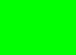

Average size of pesdestrians: (29.69, 63.68)


Average size of bicycles: (40.10, 87.75)


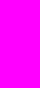

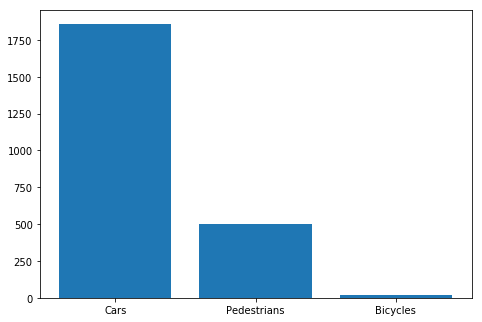

1861 cars (78.03%)
504 pedestrians (21.13%)
20 bicycles (0.84%)


In [16]:
compute_stats(batch)